In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# LOAD DATA

In [17]:
df = pd.read_csv("Davos_combined_cleaned.csv")
print("Daten erfolgreich geladen.")

Daten erfolgreich geladen.


# FILTER DATA

In [18]:
df_analysis = df[df['type'].isin(['ferienwohnung','hotel'])].copy()

num_rows = len(df_analysis)
print(f"\nNumber of filtered entries (Holiday Apartments/Hotels): {num_rows}")


Number of filtered entries (Holiday Apartments/Hotels): 81


# CREATE SCATTER PLOT

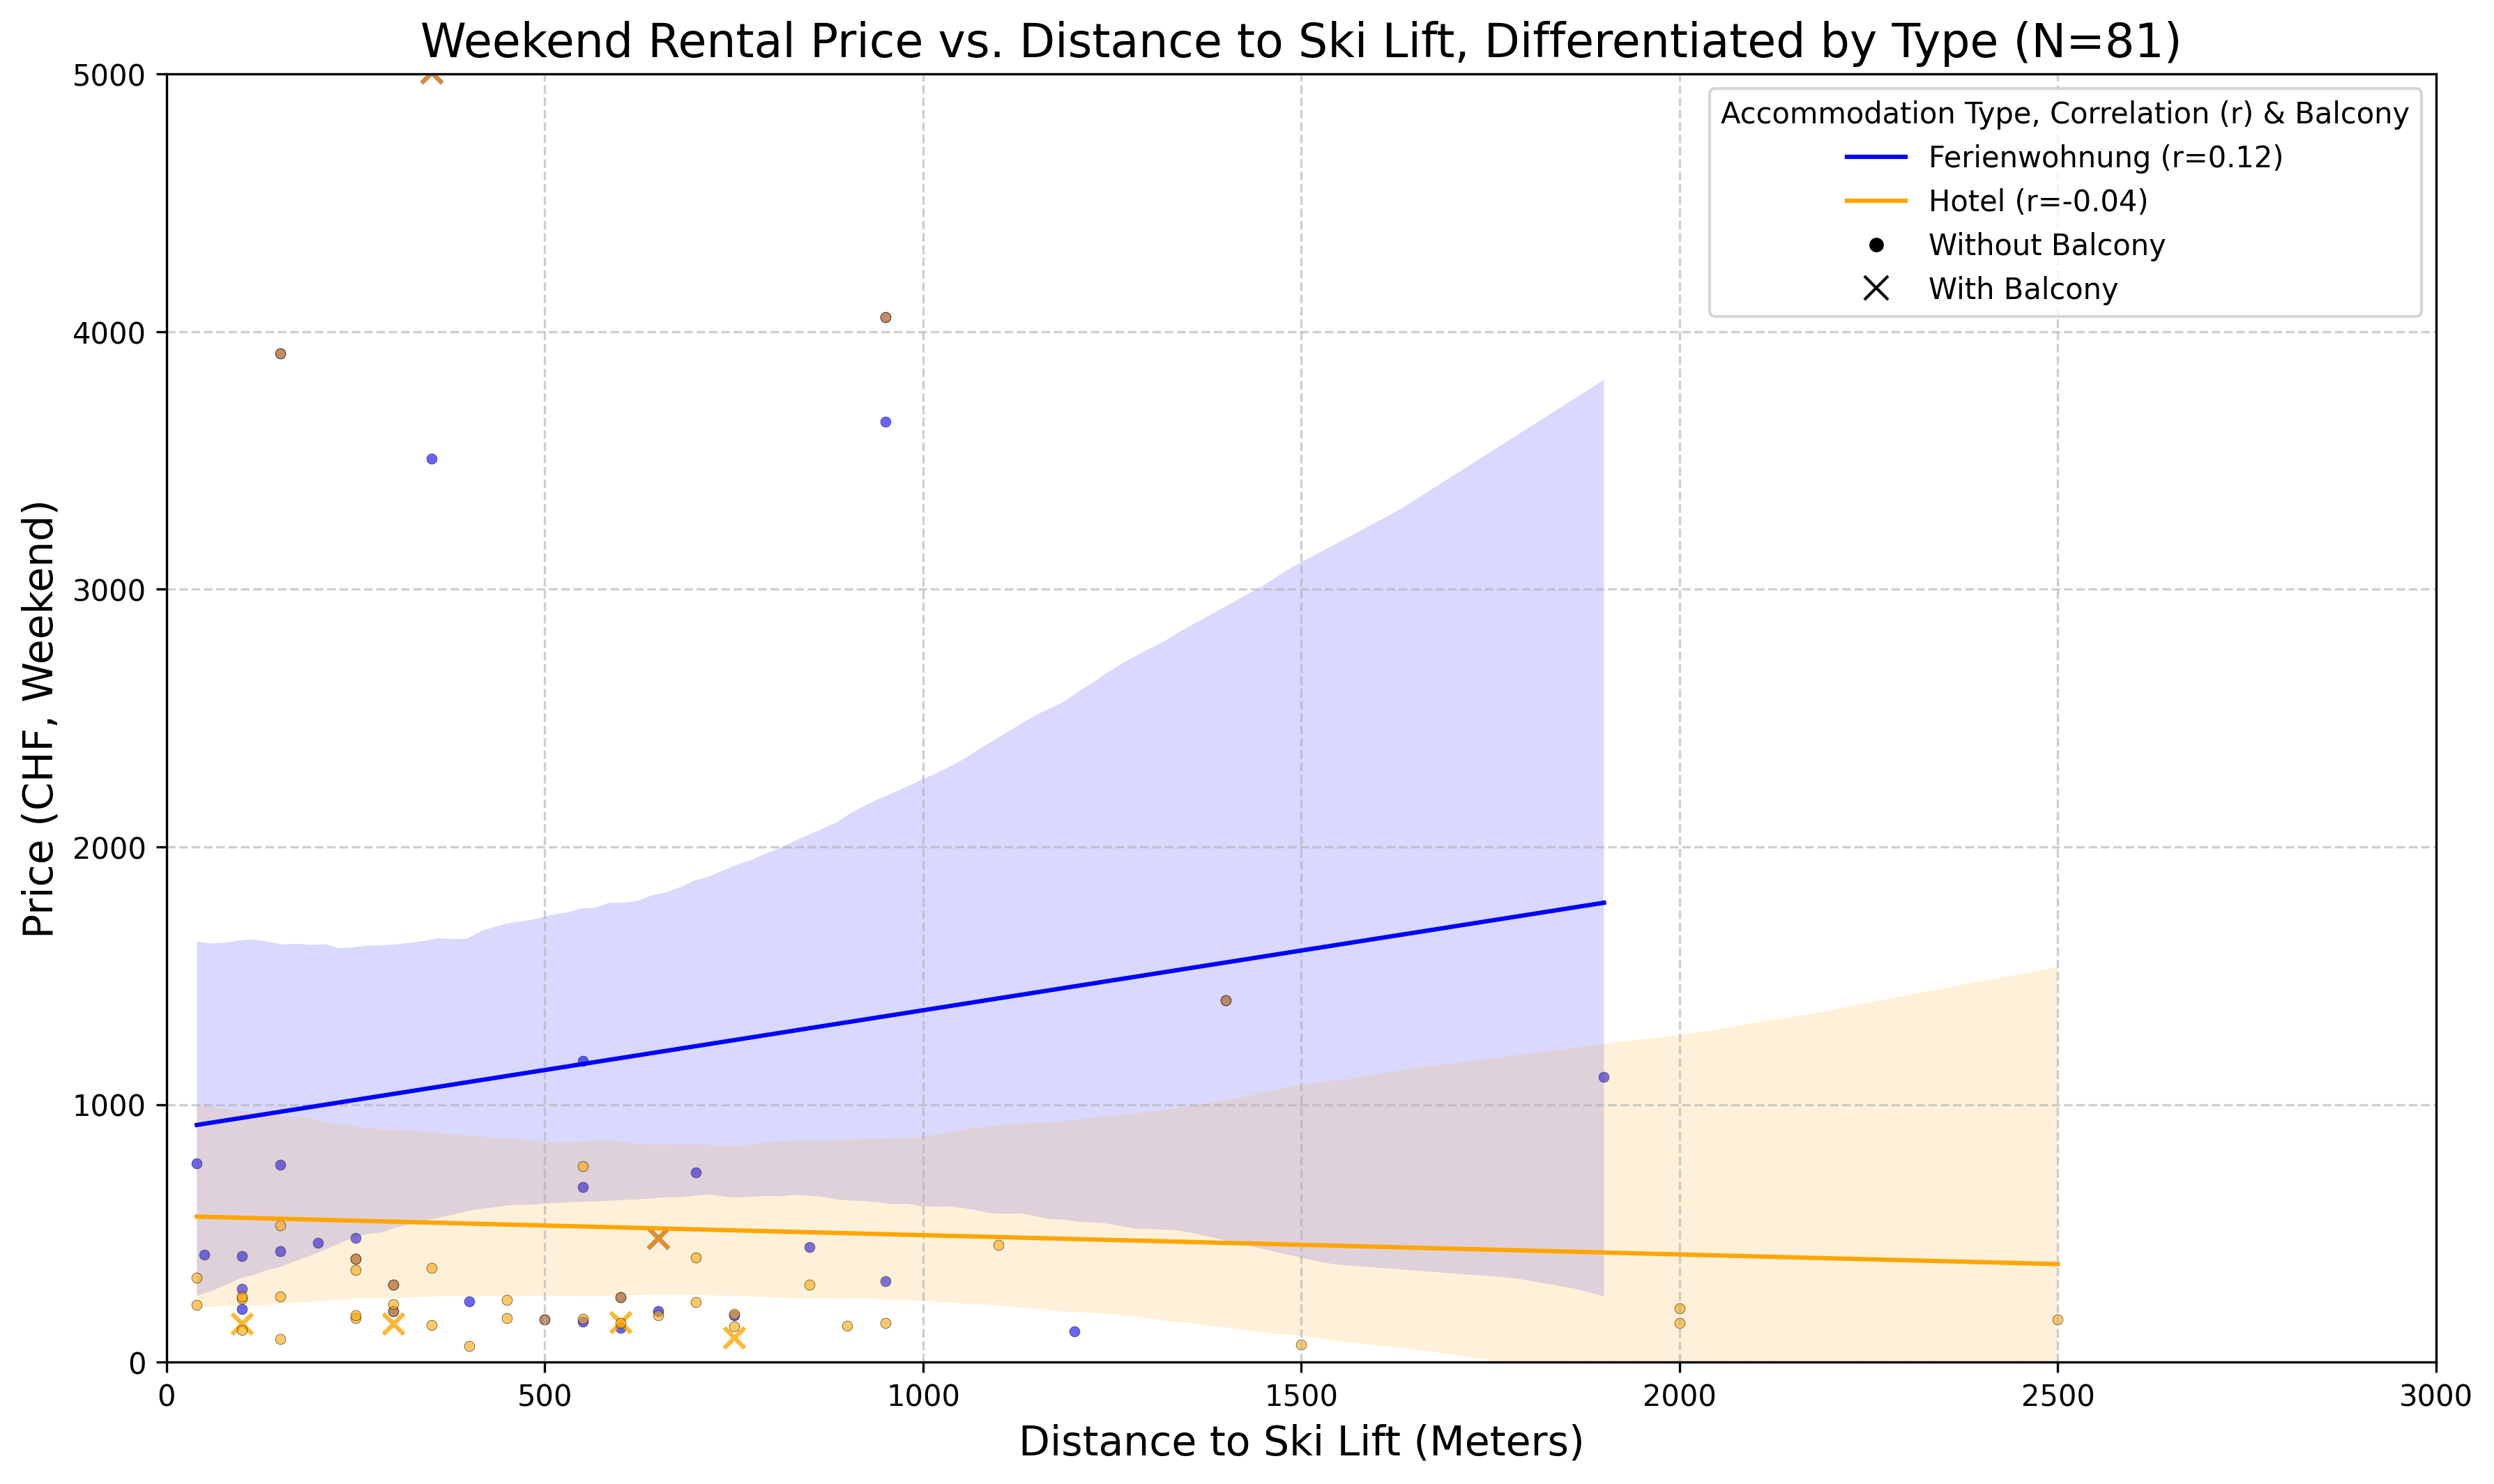

In [19]:
type_colors = {'ferienwohnung': 'blue', 'hotel': 'orange'}
unique_types = df_analysis['type'].unique()

plt.figure(figsize=(14, 8), dpi=300)


#Iterate through the accommodation types to create scatter plots and regression lines
for accommodation_type in unique_types:
    subset = df_analysis[df_analysis['type'] == accommodation_type]
    color = type_colors.get(accommodation_type, 'gray')

    plt.xlim(0, 3000)               # Set x-axis limits
    plt.ylim(0, 5000)               # Set y-axis limits 

    #Calculate Pearson's r for the label
    r_val, p_value = pearsonr(subset['distance_skilift_meters'], subset['price'])

    #Linear Regression Line and Confidence Interval (CI)
    sns.regplot(
            data=subset,
            x='distance_skilift_meters',
            y='price',
            scatter=False,          # Only draw the line and CI
            ci=95,                  # Draw the 95% Confidence Interval
            color=color,
            line_kws={'linestyle': '-', 'linewidth': 1.5},

            # Label the line/CI for the legend
            label=f"{accommodation_type.capitalize()} (r={r_val:.2f})" 
    )

    # 1. With Balcony (Marker: 'x')
    subset_with_balcony = subset[subset['has_balkon'] == True]
    
    plt.scatter(
            subset_with_balcony['distance_skilift_meters'],
            subset_with_balcony['price'],
            marker='x',             # Marker for having a balcony
            s=50,                   # Size of the marker
            color=color,            # Color based on accommodation type
            linewidth=1.5,          # Thicker border for visibility
            alpha=0.8               # Slightly less transparent
        )
    
    # 2. Without Balcony (Marker: '.')
    subset_without_balcony = subset[subset['has_balkon'] == False]
    
    plt.scatter(
            subset_without_balcony['distance_skilift_meters'],
            subset_without_balcony['price'],
            marker='.',             # Marker for not having a balcony
            s=50,                   # Size of the marker
            edgecolor='black',      # Black border for contrast
                linewidth=0.2,      # Thin border for better visibility
            color=color,            # Color based on accommodation type
            alpha=0.6               # Slightly more transparent
        )

plt.title(f"Weekend Rental Price vs. Distance to Ski Lift, Differentiated by Type (N={num_rows})",  fontsize=16)
plt.xlabel("Distance to Ski Lift (Meters)", fontsize=14)
plt.ylabel("Price (CHF, Weekend)", fontsize=14)
plt.legend(title='Accommodation Type & Correlation (r)')
plt.grid(True, linestyle='--', alpha=0.6)

# LEGEND ADJUSTMENT 
handles, labels = plt.gca().get_legend_handles_labels()
proxy_x = plt.Line2D([0], [0], linestyle='None', marker='x', markersize=8, color='black')
proxy_dot = plt.Line2D([0], [0], linestyle='None', marker='.', markersize=8, color='black')
handles.extend([proxy_dot, proxy_x])
labels.extend(['Without Balcony', 'With Balcony']) 
plt.legend(handles, labels, title='Accommodation Type, Correlation (r) & Balcony')

plt.show()